# Generalized Regression

will build a geralized regression model on the **electricity consumption** dataset. This data set got two columns i.e year and electricity consumption

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn import metrics

In [2]:
elec_cons=pd.read_csv('datas/total-electricity-consumption-us.csv',sep=',',header=0)

In [3]:
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [4]:
elec_cons.shape # we have 51 records

(51, 2)

In [5]:
elec_cons.isnull().values.any() # checking null

False

In [6]:
size=len(elec_cons.index)
index=range(0,size,5)

train=elec_cons[~elec_cons.index.isin(index)]
test=elec_cons[elec_cons.index.isin(index)]

In [7]:
train.head()

,Year,Consumption
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651
6,1926,95164


In [8]:
# converting the shape of x to 2D as required by algorithm
import numpy as np
x_train=train['Year'][:,np.newaxis]
y_train=train['Consumption']

x_test=test['Year'][:,np.newaxis]
y_test=test.Consumption

<ipython-input-8-34d833543156>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=train['Year'][:,np.newaxis]
<ipython-input-8-34d833543156>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=test['Year'][:,np.newaxis]


In [9]:
# Doing a polynomial regression: Comparing linear, quadratic 

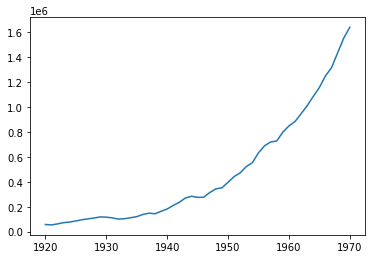

In [10]:
plt.plot(elec_cons['Year'],elec_cons['Consumption']);

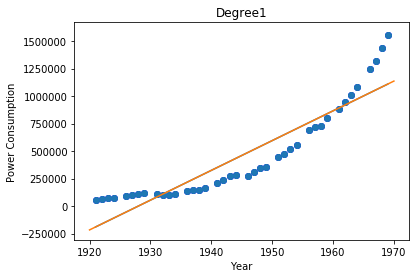

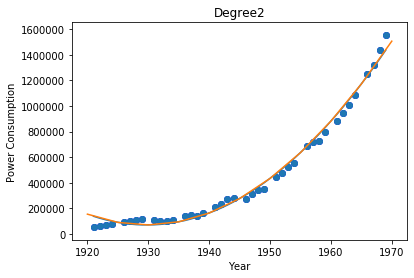

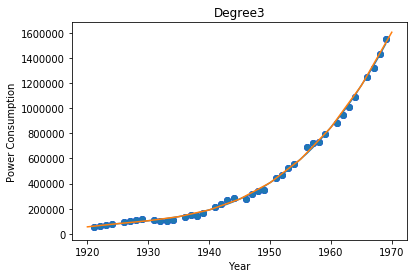

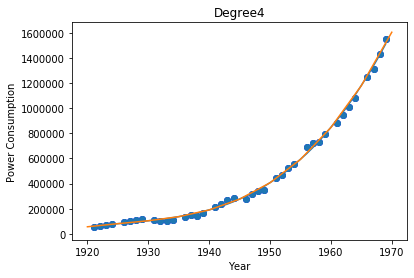

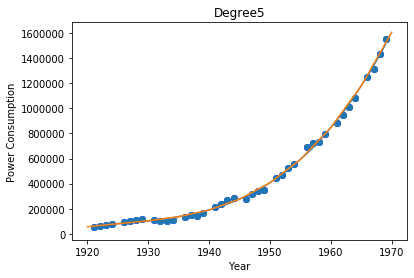

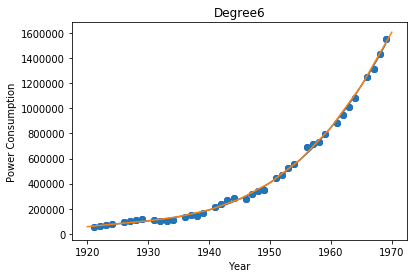

In [22]:
# Doing Polynomial regression: comparing linear, quadratic and cubic fits
# pipeline helps you associate two models or objects  to be built sequentially with each other
# in this case, the objects are PolynomialFeatures() and LinearRegression()

r2_train=[]
r2_test=[]
degrees=[1,2,3,4,5,6]

for degree in degrees:
    pipeline=Pipeline([('poly_features',PolynomialFeatures(degree=degree)),('model',LinearRegression())])
    pipeline.fit(x_train,y_train)
    y_pred=pipeline.predict(x_test)
    r2_test.append(metrics.r2_score(y_test,y_pred))
    
    # training performance
    y_pred_train=pipeline.predict(x_train)
    r2_train.append(metrics.r2_score(y_train,y_pred_train))
    
    # plot prediction and actual values against year
    fig,ax=plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power Consumption")
    ax.set_title("Degree" + str(degree))
    
    # train data in blue
    ax.scatter(x_train,y_train,c='blue')
    ax.plot(x_train,y_pred_train)
    
    # test data
    ax.scatter(x_train,y_train)
    ax.plot(x_test,y_pred)
    
    plt.show()

In [23]:
# respective test r-squared scores of predictions
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3, 4, 5, 6]
[0.8423747402176137, 0.9908896744553596, 0.9979789881969624, 0.9979839891376987, 0.9979886835880618, 0.9979930862428448]
[0.816517046382681, 0.9876080502675472, 0.9984897483992459, 0.9985021895056594, 0.9985137010313901, 0.9985245511552161]
